In [7]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

Load grid:

In [2]:
grid = cubnm_paper.data.load_grid(grid_shape=22)

How I_E varies as a function of each parameter?

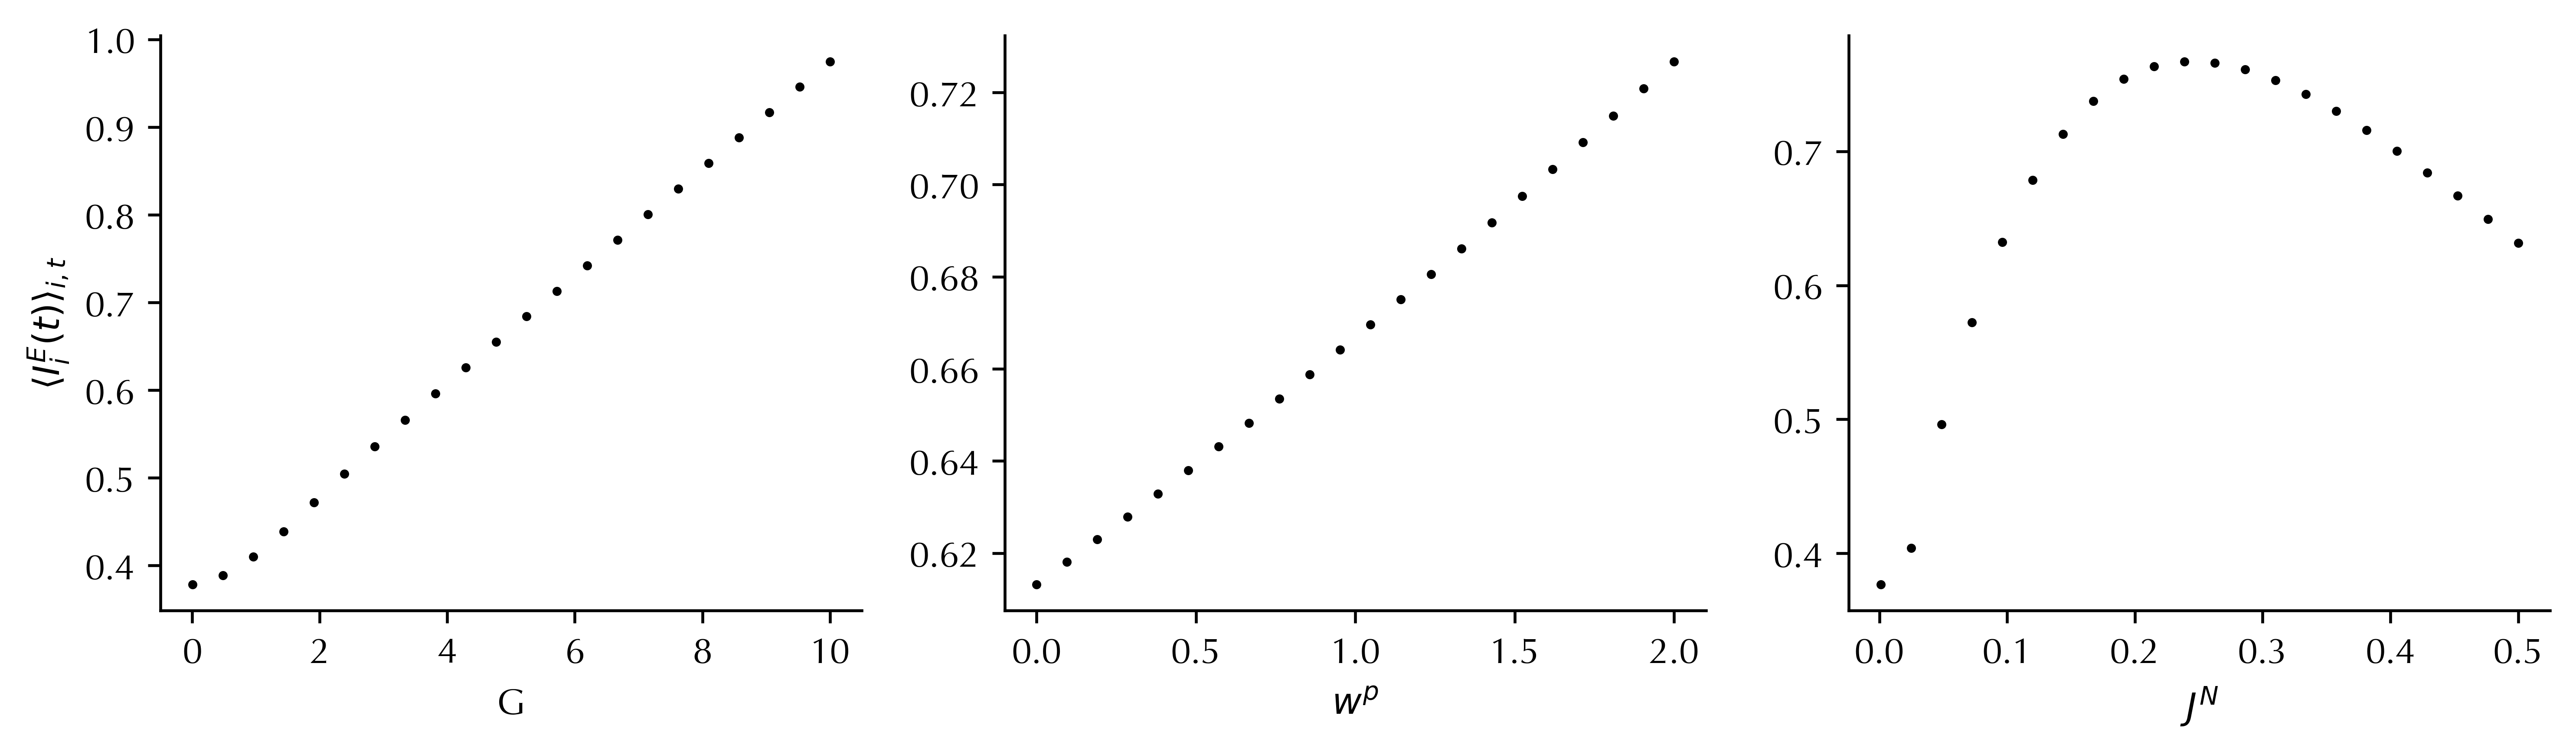

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# concatenate state averages and parameters history
hist = pd.concat([
    grid.history, 
    grid.problem.sim_group.get_state_averages()
], axis=1)

for i, param in enumerate(['G', 'w_p', 'J_N']):
    plot_data = hist.groupby(param)['I_E'].mean()
    sns.scatterplot(x=plot_data.index, y=plot_data.values, marker='.', color='black', ax=axes[i])
    axes[i].set_xlabel(grid.problem.sim_group.labels.get(param, param))
axes[0].set_ylabel(r'$\langle I^E_i(t) \rangle_{i,t}$')
sns.despine()
fig.tight_layout()
fig.savefig('S_grid_I_E_collapsed.png', transparent=True)